In [9]:
WIDTH = 320
HEIGHT = 240
#DATA_PATH = "D:/dataset/test/data_test.csv"
DATA_PATH = "D:/kitti_dataset/test/data_test.csv"
MODEL_NAME = "model_unet_custom_dataset_1719536196.keras"
SAMPLES_COUNT = 4

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import cv2

In [11]:
%run utils/datasets.ipynb

In [12]:
img_dm_pairs = read_csv(DATA_PATH)
labels = {i: j for i,j in img_dm_pairs}
test_paths = [i for i, j in img_dm_pairs]
parent_folder = DATA_PATH.rsplit('/', 1)[0]
partition = {'test': test_paths}

In [13]:
x_test = np.empty((len(test_paths), HEIGHT, WIDTH, 3))

for i, ID in enumerate(partition['test'][:]):
    x_test[i, ] = preprocess_image(ID, HEIGHT, WIDTH, depth=False, horizontal_flip=False)

In [14]:
model = tf.keras.models.load_model(MODEL_NAME, compile=False) # only for prediction

2/2 [==============================] - 2s 9ms/step


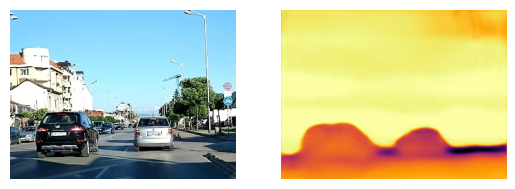

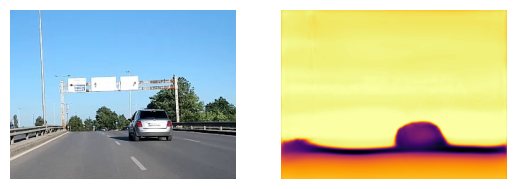

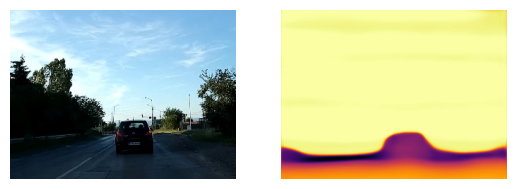

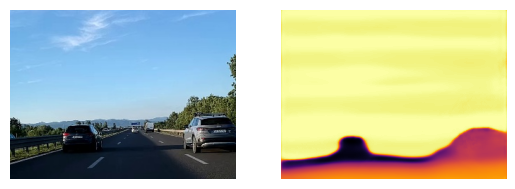

In [7]:
preds = model.predict(x_test, batch_size=2)
for i in range(len(x_test)):
    path = partition['test'][i]
    pred = preds[i]
    pred = np.squeeze(pred, axis=-1)

    plt.subplot(1, 2, 1)
    plt.axis("off")
    img1 = preprocess_image(path, HEIGHT, WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(pred * 0.4, cmap=plt.get_cmap('inferno_r'))
    
    plt.show()

2/2 [==============================] - 1s 250ms/step


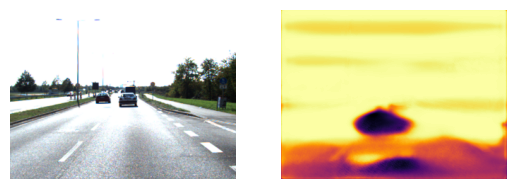

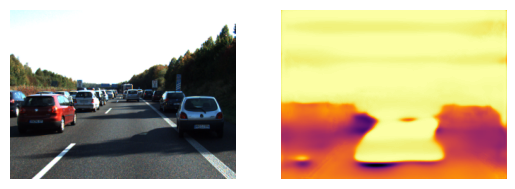

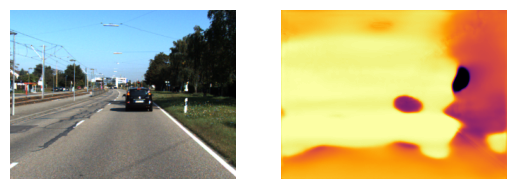

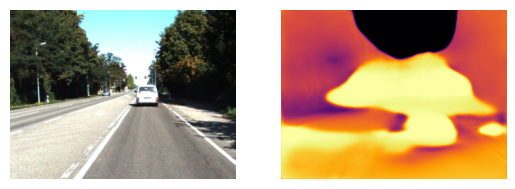

In [15]:
preds = model.predict(x_test, batch_size=2)
for i in range(len(x_test)):
    path = partition['test'][i]
    pred = preds[i]
    pred = np.squeeze(pred, axis=-1)

    plt.subplot(1, 2, 1)
    plt.axis("off")
    img1 = preprocess_image(path, HEIGHT, WIDTH, depth=False, horizontal_flip=False)
    img1 = cv2.cvtColor((img1 * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    plt.imshow(img1)

    plt.subplot(1, 2, 2)
    plt.axis("off")
    plt.imshow(pred, cmap=plt.get_cmap('inferno_r'))
    
    plt.show()